In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#mouse_data_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])
#mouse_data_complete.head()

In [3]:
mouse_data_complete["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse_ids = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
#UniqueMice = mouse_data_complete.groupby[[str("Mouse ID")str["Timepoint"]]].filter()
#mouse_data_complete["Timepoint"].nunique()
#mouse_data_complete.iloc[:, lambda .groupby()
#.array()

In [5]:
duplicate_mouse_ids

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_data_complete["Mouse ID"] == "g989"

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [7]:
duplicated_mouse_summary = mouse_data_complete[mouse_data_complete["Mouse ID"] == "g989"]


In [8]:
duplicated_mouse_summary.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_mouse_ids = mouse_data_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)


cleaned_mouse_ids.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_ids.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1636
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_varience = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_statistics_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                        "Median Tumor Volume": median_tumor_volume,
                                        "Tumor Volume Varience": tumor_volume_varience,
                                        "Tumor Volume Std. Dev.": tumor_volume_std_dev,
                                        "Tumor Volume Std. Err.": tumor_volume_sem,
                                        }
                                        )

In [12]:
drug_statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
mouse_summary_data = mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line


In [14]:
mouse_summary_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
mouse_data_complete.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [16]:
df2 = mouse_data_complete[["Drug Regimen", "Timepoint"]]

In [17]:
df2.set_index("Drug Regimen", inplace=True)

In [18]:
df2 = mouse_data_complete[["Drug Regimen"]].value_counts()

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2

Drug Regimen
Capomulin       230
Ramicane        228
Ketapril        188
Naftisol        186
Zoniferol       182
Placebo         181
Stelasyn        181
Ceftamin        178
Infubinol       178
Propriva        161
dtype: int64

<AxesSubplot:title={'center':'Drug Obseverances'}, xlabel='Drug Regimen', ylabel='number of obverved mouse timepoints'>

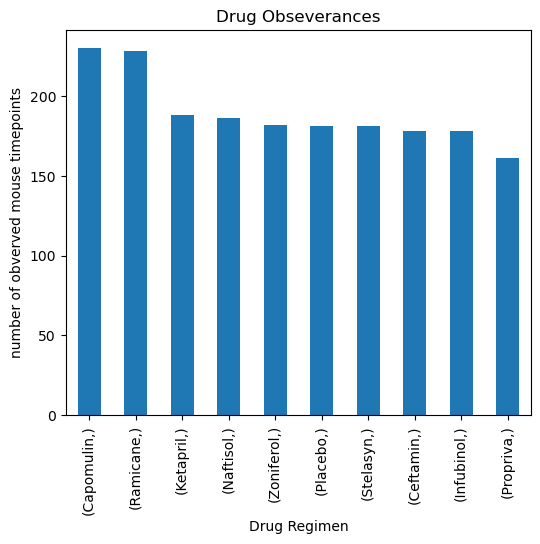

In [20]:
df2.plot(ylabel="number of obverved mouse timepoints", kind  = "bar", figsize = (6,5), title = "Drug Obseverances") 
#df2.plot.ylabel()
#df2.show()


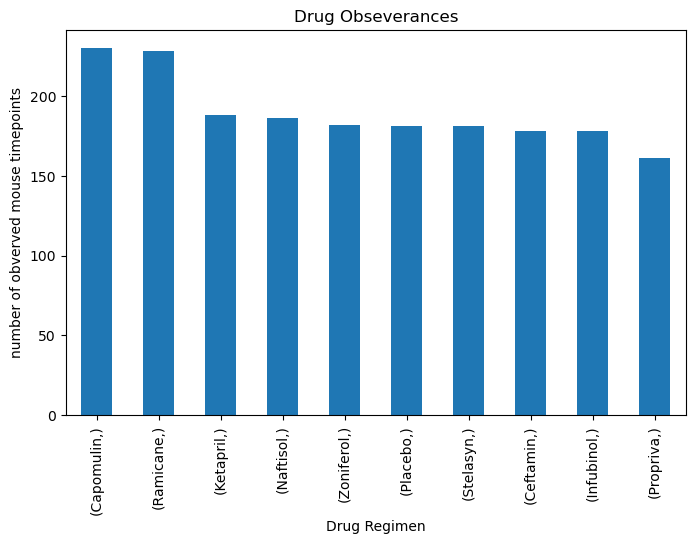

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df2.plot(kind  = "bar", figsize = (8,5), title = "Drug Obseverances")
plt.xlabel("Drug Regimen")
plt.ylabel("number of obverved mouse timepoints")
plt.show()


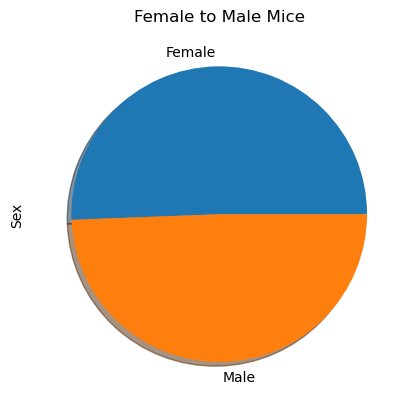

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mice_Labels = ["Female", "Male"]

sf2 = mouse_data_complete["Sex"].value_counts()
sf2.plot(kind="pie", labels = Mice_Labels,
       shadow = True)
plt.title("Female to Male Mice")
plt.show()


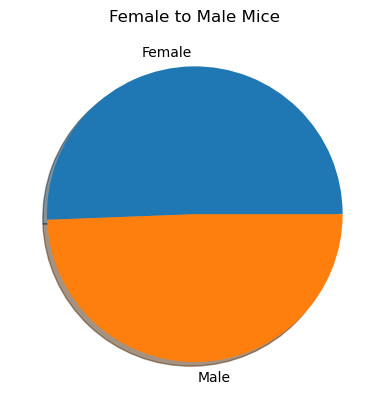

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Mice_Labels = ["Female", "Male"]
sf2 = mouse_data_complete["Sex"].value_counts()
#df['col_name'].value_counts()
plt.pie(x = sf2, labels = Mice_Labels,
       shadow = True)
plt.title("Female to Male Mice")
plt.show()

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_time = mouse_data_complete.groupby("Mouse ID")[ "Timepoint"].max()

mouse_time = mouse_time.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#merged_mice = mouse_data_complete.merge(mouse_time, on=["Mouse ID", "Timepoint"])
merged_mice = mouse_time.merge(mouse_data_complete, on=["Mouse ID", "Timepoint"])

In [25]:
merged_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [33]:
# Put treatments into a list for a for loop (and later for plot labels)
drug_labels = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

#itorator_m = {}

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_data
mousey_tumor_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in drug_labels:
    
    final_tumor_volume_data = merged_mice.loc[merged_mice["Drug Regimen"]==x, "Tumor Volume (mm3)"]

    
    # add subset 
    mousey_tumor_data.append(final_tumor_volume_data)

    # Determine outliers using upper and lower bounds
    quartiles = mousey_tumor_data.quantile([0.25, 0.5,0.75])
    upperQ = quartiles[0.75]
    lowerQ = quartiles[0.25]
    iQR = upperQ - lowerQ
    upperBound = upperQ + 1.5 * IQR # upper bound
    lowerBound = lowerQ - 1.5 * IQR # dower bound
    highOutliers = mousey_tumor_data < lowerBound
    # https://stats.stackexchange.com/questions/156778/percentile-vs-quantile-vs-quartile


# quartile ~= quarter
# quantile ~= quant

# 0 quartile = 0 quantile = 0 percentile

# 1 quartile = 0.25 quantile = 25 percentile

# 2 quartile = .5 quantile = 50 percentile (median)

# 3 quartile = .75 quantile = 75 percentile

# 4 quartile = 1 quantile = 100 percentile
    
    
# the for loop will be used to loop through each drug name and then pick out tumor volume as the comment states and append to list
# so then you will have a list of all the max tumor volumes per the 4 treatments they asked for

# that list what you will be performing the quartile calculation on

# and identify which one falls out of the lower and upper bounds based on the IQR
mousey_tumor_data

AttributeError: 'list' object has no attribute 'quantile'

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
